<a href="https://colab.research.google.com/github/GUmarEla/Image_Processing/blob/main/II_ImageFiltering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Note:**
We worked with 'reflect' as a padding mode in all exemples.

### Introduction:

You can categorize filters based on linear/ non linear and spatial/ frequency method you use.
*  Linear filters

is the filters where the output pixel is linear combinations of the neighboring input pixels. It can be done with convolution operation. For example, mean/average filters or Gaussian filter.

*  Non-Linear filters

Non-linear filter is a filter whose output is not a linear function of its input. Non-linear filtering cannot be done with convolution or Fourier multiplication. Median filter is a simple example of a non-linear filter.

*  Spatial filters

Spatial Filtering technique is used directly on pixels of an image. Filter mask is usually created in odd size so that it has specific center pixel. This mask is moved on the image such that the center of the mask traverses all image pixels.

*  Frequency filters

This kind of filters are mainly focusing on the frequency of the image instead of the pixel intensity values. It is used for two kinds of operation namely smoothing and sharpening of images.

**- Linear/ Spatial filtering**
*   gaussian_smoothing(image, kenel_size, sigma)
*   linear_spatial_filter(image, kernel)

 [this one can be used for sobel/ laplacien ... just put the kernel]

**- Linear/ Frequency filters**
*   frequency_ideal_low_pass(image, D0)
*   frequency_ideal_high_pass(image, D0)
*   frequency_ideal_band_pass(image, D1, D2)
*   frequency_ideal_band_stop(image, D1, D2)

**- Non Linear/ Spatial filters**
*   median_filter(image)
*   bilateral_filtering(image, kernel_dimension, SigmaS, SigmaR)

**- Non Linear/ Frequency filters**
*   homomorphic_filter(image, sigma, alpha, beta)








### Import libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt

### Load Image

In [33]:
# Import necessary libraries
import requests
import cv2

# Define the image URL
# url = 'https://boofcv.org/images/thumb/6/66/Kodim17_noisy.jpg/300px-Kodim17_noisy.jpg'
url = 'https://i.sstatic.net/fkdjn.jpg'

# Download the image
response = requests.get(url)
img_data = response.content

# Convert image data to a NumPy array
img_array = np.frombuffer(img_data, np.uint8)

# Decode the images
image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

More info:

https://medium.com/@rajilini/different-filters-for-image-processing-698e72924101

### Linear/ Spatial filter

Linear filtering is the filtering method where the value of output pixel is linear combinations of the neighboring input pixels. It can be done with convolution operation. For example, mean/average filters or Gaussian filter.

**Gaussian Smoothing**

In [ ]:
import numpy as np
from scipy.signal import convolve2d

# gausian kernel to use in Gaussian Smotohing algorithm later
def gaussian_kernel(dimension, sigma):
  kernel = np.ones((dimension, dimension))
  center = dimension // 2
  tot = 0.0

  for i in range(dimension):
    for j in range(dimension):
      m = np.exp(- ((i-center)**2+(j-center)**2 )/(2*sigma**2) )
      kernel[i][j] = (1/(2*np.pi*sigma**2)) * m
      tot += kernel[i][j]

  return kernel / tot

# Gaussian Smotohing algorithm for 1 channel
def gaussian_smoothing_channel(image, kernel_size, sigma):
  image = image.astype(np.uint8)
  d = kernel_size // 2

  #1 Create kernel (gaussian kernel in this case)
  kernel = gaussian_kernel(kernel_size, sigma)

  #2 add padding to image
  new_image = np.pad(image, d, mode='reflect')

  #3 convolve image qith kernel
  result_image = convolve2d(new_image, kernel)

  #4 remove padding
  result_image = result_image[d:-d, d:-d]

  return result_image

  # General gaussian smoothing
def gaussian_smoothing(image, kernel_size, sigma):
  if len(image.shape) == 2:
    return gaussian_smoothing_channel(image, kernel_size, sigma)

  else:
    # splt /separate channels
    r_channel, g_channel, b_channel = cv2.split(image)

    # applying the contrast to each channel
    new_r_channel = gaussian_smoothing_channel(r_channel, kernel_size, sigma).astype(np.uint8)
    new_g_channel = gaussian_smoothing_channel(g_channel, kernel_size, sigma).astype(np.uint8)
    new_b_channel = gaussian_smoothing_channel(b_channel, kernel_size, sigma).astype(np.uint8)

    # merge channels
    result_image = cv2.merge([new_r_channel, new_g_channel, new_b_channel])
  return result_image


(-0.5, 963.5, 723.5, -0.5)

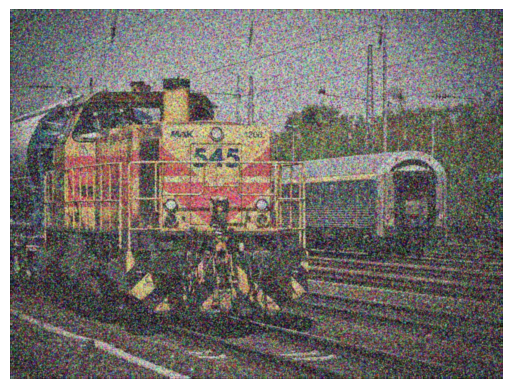

In [ ]:
# plt.imshow(gaussian_smoothing(image_gray, 5, .8), cmap='gray')
plt.imshow(gaussian_smoothing(image_color, 5, .8), cmap='gray')

plt.axis('off')

**Mean/ Laplacien/ Sobel filters**

For all ***linear/ spatial filters***, the steps are like in gaussian filter,
you only have to change the kernel:

*   Mean filter
*   Laplacien filter
*   Sobel filter

(the kernels for the three mentioned are below)

**kernels:**

In [ ]:
# mean kernels:
meankernel_3x3 = np.ones((3, 3)) * (1/9)

meankernel_5x5 = np.ones((5, 5)) * (1/25)

# Gaussian kernels:
gaussian_3x3 = 1/16 * np.array([[1, 2, 1],
                 [2, 4, 2],
                 [1, 2, 1]])

gaussian_5x5 = 1/273 * np.array([[1, 4, 7, 4, 1],
                  [4, 16, 26, 16, 4],
                  [7, 26, 41, 26, 7],
                  [4, 16, 26, 16, 4],
                  [1, 4, 7, 4, 1]])

# Laplacien kernles:
laplacien_3x3 = np.array([[0, -1, 0],
          [-1, 4, -1],
          [0, -1, 0]])

laplacien_5x5 = np.array([[0, 0, -1, 0, 0],
          [0, -1, -2, -1, 0],
          [-1, -2, 16, -2, -1],
          [0, -1, -2, -1, 0],
          [0, 0, -1, 0, 0]])

# Sobel kernels:
sobel_3x3 = np.array([[-1, 0, 1],
          [-2, 0, 2],
          [-1, 0, 1]])

sobel_5x5 = np.array([[-1, -2, -1],
          [0, 0, 0],
          [1, 2, 1]])

# the algo is below that will need thes kernels

In [ ]:
import numpy as np
from scipy.signal import convolve2d

# linear spatial filters for 1 channel
def linear_spatial_filter_channel(image, kernel):
  d = kernel.shape[0] // 2
  image = image.astype(np.uint8)

  # add padding to image
  new_image = np.pad(image, d, mode='reflect')

  # convolve image qith kernel
  result_image = convolve2d(new_image, kernel)

  # remove padding
  result_image = result_image[d:-d, d:-d]

  return result_image

# General linear spatial filters
def linear_spatial_filter(image, kernel):
  if len(image.shape) == 2:
    return linear_spatial_filter_channel(image, kernel)

  else:
    # splt /separate channels
    r_channel, g_channel, b_channel = cv2.split(image)

    # applying the contrast to each channel
    new_r_channel = linear_spatial_filter_channel(r_channel, kernel).astype(image.dtype)
    new_g_channel = linear_spatial_filter_channel(g_channel, kernel).astype(image.dtype)
    new_b_channel = linear_spatial_filter_channel(b_channel, kernel).astype(image.dtype)

    # merge channels
    result_image = cv2.merge([new_r_channel, new_g_channel, new_b_channel])
  return result_image

### Linear /Frequency Filters

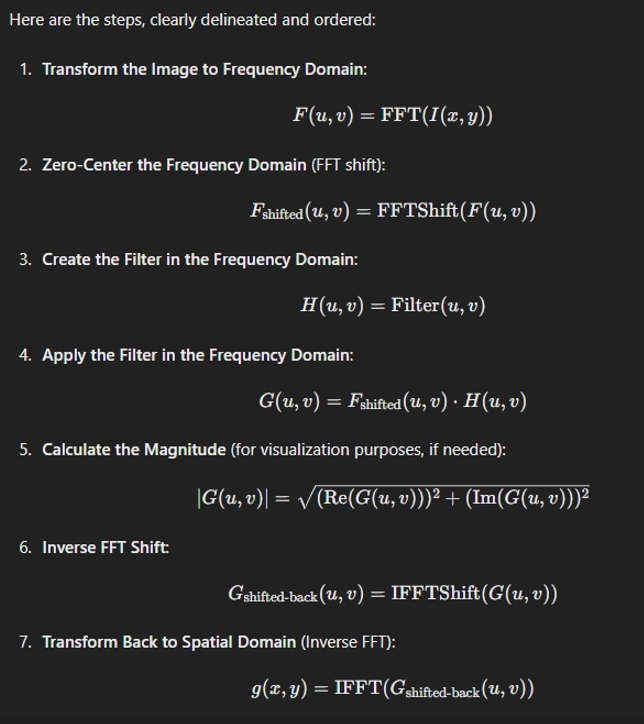

You only have to change part 3 (Create filter)

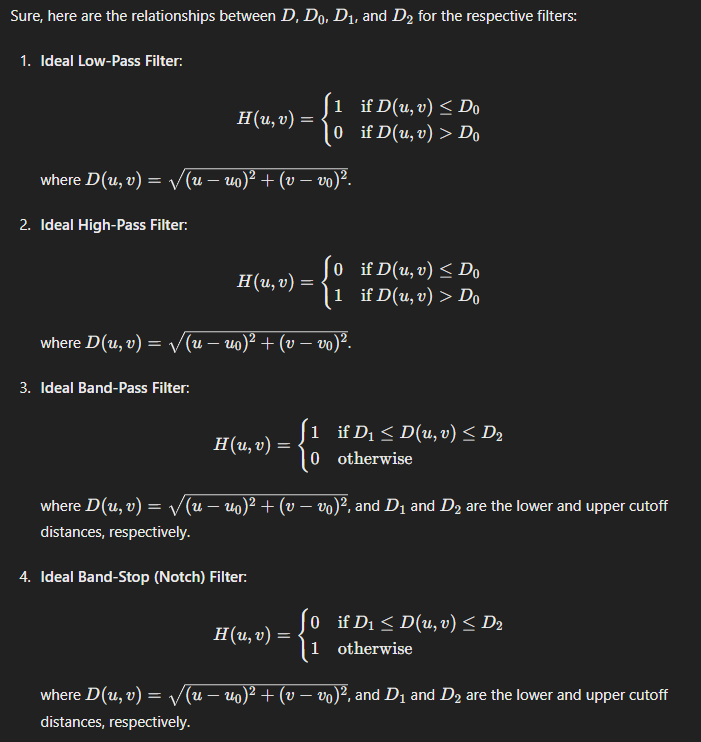

**frequency ideal low pass**

In [ ]:
import numpy as np

def frequency_ideal_low_pass_channel(image, D0):
  hei, wid = image.shape[0:2]

  #1 fourier transform
  fourier_image = np.fft.fft2(image)

  #2 shift zero
  shifted_image = np.fft.fftshift(fourier_image)

  #3 Create filter
  filter = np.ones((hei, wid))
  i_center = hei // 2
  j_center = wid // 2

  for i in range(hei):
    for j in range(wid):
      if np.sqrt( (i-i_center)**2 + (j-j_center)**2 ) <= D0:
        filter[i,j] = 1

  #4 Apply filter to image
  filtered_image =  shifted_image * filter

  #5 imshift image
  shifted_filtered_image = np.fft.ifftshift(filtered_image)

  #6 IFFT
  ifft_image = np.fft.ifft2(shifted_filtered_image)

  #7 Transform image back (IFT)
  magnitude_image = np.abs(ifft_image)
  result_image = np.clip(magnitude_image,0,255).astype(np.uint8)

  return result_image

def frequency_ideal_low_pass(image, D0):
  if len(image.shape) == 2:
    return frequency_ideal_low_pass_channel(image, D0)

  else:
    # splt /separate channels
    r_channel, g_channel, b_channel = cv2.split(image)

    # applying the contrast to each channel
    new_r_channel = frequency_ideal_low_pass_channel(r_channel, D0)
    new_g_channel = frequency_ideal_low_pass_channel(g_channel, D0)
    new_b_channel = frequency_ideal_low_pass_channel(b_channel, D0)

    # merge channels
    result_image = cv2.merge([new_r_channel, new_g_channel, new_b_channel])
  return result_image

**Frequency ideal high pass**

In [ ]:
import numpy as np

def frequency_ideal_high_pass_channel(image, D0):
  hei, wid = image.shape[0:2]

  #1 fourier transform
  fourier_image = np.fft.fft2(image)

  #2 shift zero
  shifted_image = np.fft.fftshift(fourier_image)

  #3 Create filter
  filter = np.ones((hei, wid))
  i_center = hei // 2
  j_center = wid // 2

  for i in range(hei):
    for j in range(wid):
      if np.sqrt( (i-i_center)**2 + (j-j_center)**2 ) <= D0:
        filter[i,j] = 0

  #4 Apply filter to image
  filtered_image =  shifted_image * filter

  #5 imshift image
  shifted_filtered_image = np.fft.ifftshift(filtered_image)

  #6 IFFT
  ifft_image = np.fft.ifft2(shifted_filtered_image)

  #7 Transform image back (IFT)
  magnitude_image = np.abs(ifft_image)
  result_image = np.clip(magnitude_image,0,255).astype(np.uint8)

  return result_image

def frequency_ideal_high_pass(image, D0):
  if len(image.shape) == 2:
    return frequency_ideal_high_pass_channel(image, D0)

  else:
    # splt /separate channels
    r_channel, g_channel, b_channel = cv2.split(image)

    # applying the contrast to each channel
    new_r_channel = frequency_ideal_high_pass_channel(r_channel, D0)
    new_g_channel = frequency_ideal_high_pass_channel(g_channel, D0)
    new_b_channel = frequency_ideal_high_pass_channel(b_channel, D0)

    # merge channels
    result_image = cv2.merge([new_r_channel, new_g_channel, new_b_channel])
  return result_image

**Frequency ideal band pass**

In [ ]:
import numpy as np

def frequency_ideal_band_pass_channel(image, D1, D2):
  hei, wid = image.shape[0:2]

  #1 fourier transform
  fourier_image = np.fft.fft2(image)

  #2 shift zero
  shifted_image = np.fft.fftshift(fourier_image)

  #3 Create filter
  filter = np.ones((hei, wid))
  i_center = hei // 2
  j_center = wid // 2

  for i in range(hei):
    for j in range(wid):
      D = np.sqrt( (i-i_center)**2 + (j-j_center)**2 )
      if  D >= D1 and D <= D2:
        filter[i,j] = 1

  #4 Apply filter to image
  filtered_image =  shifted_image * filter

  #5 imshift image
  shifted_filtered_image = np.fft.ifftshift(filtered_image)

  #6 IFFT
  ifft_image = np.fft.ifft2(shifted_filtered_image)

  #7 Transform image back (IFT)
  magnitude_image = np.abs(ifft_image)
  result_image = np.clip(magnitude_image,0,255).astype(np.uint8)

  return result_image

def frequency_ideal_band_pass(image, D1, D2):
  if len(image.shape) == 2:
    return frequency_ideal_band_pass_channel(image, D1, D2)

  else:
    # splt /separate channels
    r_channel, g_channel, b_channel = cv2.split(image)

    # applying the contrast to each channel
    new_r_channel = frequency_ideal_band_pass_channel(r_channel, D1, D2)
    new_g_channel = frequency_ideal_band_pass_channel(g_channel, D1, D2)
    new_b_channel = frequency_ideal_band_pass_channel(g_channel, D1, D2)

    # merge channels
    result_image = cv2.merge([new_r_channel, new_g_channel, new_b_channel])
  return result_image

**Frequency ideal band stop**

In [ ]:
import numpy as np

def frequency_ideal_band_stop_channel(image, D1, D2):
  hei, wid = image.shape[0:2]

  #1 fourier transform
  fourier_image = np.fft.fft2(image)

  #2 shift zero
  shifted_image = np.fft.fftshift(fourier_image)

  #3 Create filter
  filter = np.ones((hei, wid))
  i_center = hei // 2
  j_center = wid // 2

  for i in range(hei):
    for j in range(wid):
      D = np.sqrt( (i-i_center)**2 + (j-j_center)**2 )
      if  D >= D1 and D <= D2:
        filter[i,j] = 0

  #4 Apply filter to image
  filtered_image =  shifted_image * filter

  #5 imshift image
  shifted_filtered_image = np.fft.ifftshift(filtered_image)

  #6 IFFT
  ifft_image = np.fft.ifft2(shifted_filtered_image)

  #7 Transform image back (IFT)
  magnitude_image = np.abs(ifft_image)
  result_image = np.clip(magnitude_image,0,255).astype(np.uint8)

  return result_image

def frequency_ideal_band_stop(image, D1, D2) :
  if len(image.shape) == 2:
    return frequency_ideal_band_stop_channel(image, D1, D2)

  else:
    # splt /separate channels
    r_channel, g_channel, b_channel = cv2.split(image)

    # applying the contrast to each channel
    new_r_channel = frequency_ideal_band_stop_channel(r_channel, D1, D2)
    new_g_channel = frequency_ideal_band_stop_channel(g_channel, D1, D2)
    new_b_channel = frequency_ideal_band_stop_channel(g_channel, D1, D2)

    # merge channels
    result_image = cv2.merge([new_r_channel, new_g_channel, new_b_channel])
  return result_image

### Non linear/ Spatial filters

**Median filter**

In [ ]:
import numpy as np

def median_filter_channel(image):
  hei, wid = image.shape

  # Add padding to the image
  padded_image = np.pad(image, 1, mode='reflect')

  # median of 3 by 3 pixels around
  new_image = np.zeros((hei, wid))
  for i in range(hei):
    for j in range(wid):
      new_image[i,j] = np.median(padded_image[i:i+3, j:j+3]).astype(np.uint8)
  return new_image

def median_filter(image):
  if len(image.shape) == 2:
    return median_filter(image)

  else:
    # splt /separate channels
    r_channel, g_channel, b_channel = cv2.split(image)

    # applying the contrast to each channel
    new_r_channel = median_filter(r_channel)
    new_g_channel = median_filter(g_channel)
    new_b_channel = median_filter(b_channel)

    # merge channels
    result_image = cv2.merge([new_r_channel, new_g_channel, new_b_channel])
  return result_image

**Bilateral filter**

Steps for bilateral filtering:

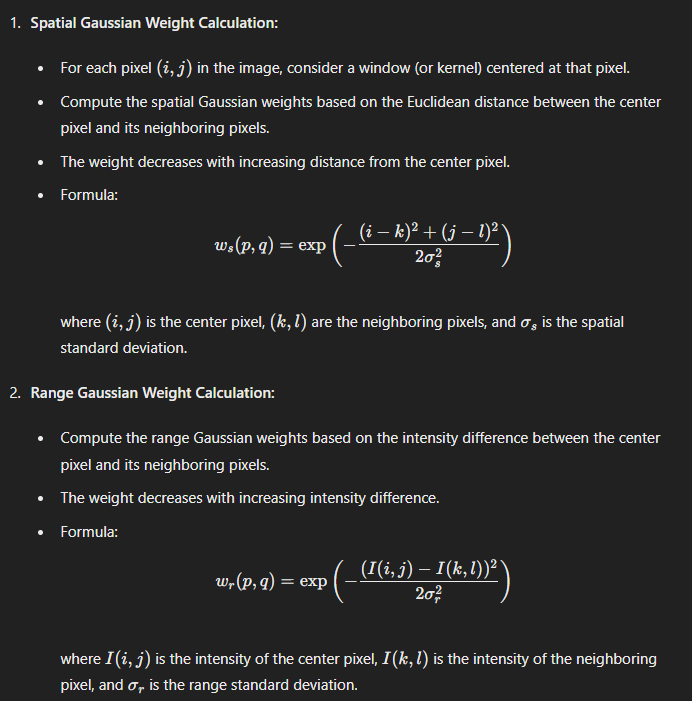

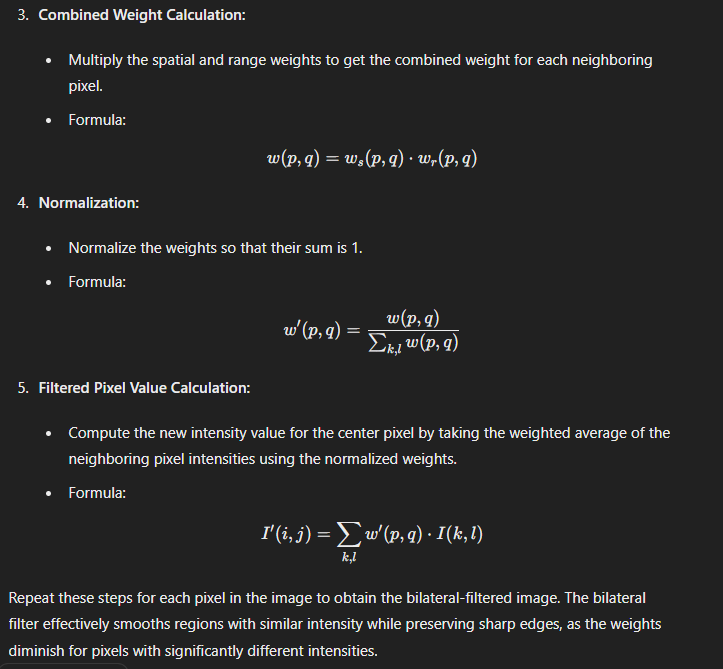

In [ ]:
import numpy as np
import cv2

def bilateral_filtering_channel(image, kernel_dimension, SigmaS, SigmaR):
  d = kernel_dimension // 2

  # Spatial Gaussian Weight (Ws)
  i_center = j_center = d
  weighted_matrix = np.zeros((kernel_dimension, kernel_dimension))

  for i in range(kernel_dimension):
    for j in range(kernel_dimension):
      element_s = ((i-i_center)**2 +(j-j_center)**2)/(2*SigmaS**2)
      weighted_matrix[i,j] = np.exp(-element_s)

  # Padding the image for range gaussian
  padded_image = np.pad(image, d, mode='reflect')

  # Range Gaussian Weight (Wr)
  # Create sliding window for gaussian
  slide_window = np.lib.stride_tricks.sliding_window_view(padded_image, (kernel_dimension,kernel_dimension))

  hei_window, wid_window = slide_window.shape[:2]

  result_image = np.zeros((hei_window, wid_window)).astype(image.dtype)

  for i in range(hei_window):
    for j in range(wid_window):
      # Range Gaussian Weight (Wr)
      element_r = slide_window[i][j] - slide_window[i][j][d][d]
      range_matrix = np.exp(-(element_r)**2/(2*SigmaR**2))

      combined_weight = weighted_matrix * range_matrix
      combined_weight /= np.sum(combined_weight)

      result_image[i,j] = np.sum(slide_window[i,j] * combined_weight)

  return result_image

def bilateral_filtering(image, kernel_dimension, SigmaS, SigmaR):
  if len(image.shape) == 2:
    return bilateral_filtering_channel(image, kernel_dimension, SigmaS, SigmaR)

  else:
    # splt /separate channels
    r_channel, g_channel, b_channel = cv2.split(image)

    # applying the contrast to each channel
    new_r_channel = bilateral_filtering_channel(r_channel, kernel_dimension, SigmaS, SigmaR)
    new_g_channel = bilateral_filtering_channel(g_channel, kernel_dimension, SigmaS, SigmaR)
    new_b_channel = bilateral_filtering_channel(b_channel, kernel_dimension, SigmaS, SigmaR)

    # merge channels
    result_image = cv2.merge([new_r_channel, new_g_channel, new_b_channel])
  return result_image

### Non linear/ Frequency filters

**Homomorphic Filtering**

In [43]:
import numpy as np
import cv2

def homomorphic_filter_channel(image, sigma, alpha, beta):
    hei, wid = image.shape[:2]

    # Logarithmic transformation
    log_image = np.log1p(image)  # np.log1p(x) is equivalent to np.log(x + 1)

    # Fourier transform
    fourier_image = np.fft.fft2(log_image)
    fourier_image = np.fft.fftshift(fourier_image)

    # Design filter (high-pass)
    u = np.fft.fftfreq(hei) * hei
    v = np.fft.fftfreq(wid) * wid
    U, V = np.meshgrid(v, u)
    D_uv = np.sqrt(U**2 + V**2)
    filter = alpha + beta * (1 - np.exp(-(D_uv**2) / (2 * sigma**2)))

    # Ensure filter and fourier_image have the same shape
    filter = np.fft.fftshift(filter)  # Center the filter

    # Apply filter
    filtered_image = filter * fourier_image

    # Inverse Fourier transform
    inverse_fourier_image = np.fft.ifftshift(filtered_image)
    inverse_fourier_image = np.fft.ifft2(inverse_fourier_image)

    # Magnitude image
    magnitude_image = np.abs(inverse_fourier_image)

    # Exponentiation
    result_image = np.expm1(magnitude_image)  # np.expm1(x) is equivalent to np.exp(x) - 1

    # Clip the values of the image
    result_image = np.clip(result_image, 0, 255)

    return result_image.astype(np.uint8)

def homomorphic_filter(image, sigma, alpha, beta):
  if len(image.shape) == 2:
    return homomorphic_filter_channel(image, sigma, alpha, beta)

  else:
    # splt /separate channels
    r_channel, g_channel, b_channel = cv2.split(image)

    # applying the contrast to each channel
    new_r_channel = homomorphic_filter_channel(r_channel, sigma, alpha, beta)
    new_g_channel = homomorphic_filter_channel(g_channel, sigma, alpha, beta)
    new_b_channel = homomorphic_filter_channel(b_channel, sigma, alpha, beta)

    # merge channels
    result_image = cv2.merge([new_r_channel, new_g_channel, new_b_channel])
  return result_image

### Additional Code (Gaussian kernel, Discret fourier transform)

*   Gaussian kernel
*   Fourier transform

In [ ]:
# Gaussian kernel (used and mentioned before in gaussian smoothing)
def gaussian_kernel(dimension, sigma):
  kernel = np.ones((dimension, dimension))
  center = dimension // 2
  tot = 0.0

  for i in range(dimension):
    for j in range(dimension):
      m = np.exp(- ((i-center)**2+(j-center)**2 )/(2*sigma**2) )
      kernel[i][j] = (1/(2*np.pi*sigma**2)) * m
      tot += kernel[i][j]
  return kernel / tot

# fourier transform
def discret_fourier_transform(image):
  new_image = np.zeros((image.shape))
  hei, len = image.shape[0:2]

  for i0 in range(hei):
    for j0 in range(len):
      tot = 0
      for i1 in range(hei):
        for j1 in range(len):
          val = np.exp(-2j*np.pi*((i0*i1)/hei+(j0*j1)/len))
          tot += image[i1,j1]*val
      new_image[i0,j0] = tot
  return

---------------------------------